### Problem Statement: Investigating the Relationship between Temperature and Salinity using Linear Regression

In [1]:
#import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# loading dataset, this is the path from my local system
dataset =  pd.read_csv(r"D:\AI\Datasets\bottle.csv")
dataset

C:\Users\Arjun Zayn\AppData\Local\Temp\ipykernel_28248\1239266332.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset =  pd.read_csv(r"D:\AI\Datasets\bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(864863, 74)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [6]:
dataset.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [8]:
#data preparation
df = dataset[['T_degC',
       'Salnty']]

In [9]:
df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [10]:
df.isna().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [11]:
df.dropna(axis = 0, inplace =  True)

C:\Users\Arjun Zayn\AppData\Local\Temp\ipykernel_28248\3931961377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis = 0, inplace =  True)


In [12]:
df.shape

(814247, 2)

In [13]:
#i have took 1st 1000 rows
df = df.sample(1000)

In [14]:
df.shape

(1000, 2)

In [15]:
df.describe()

,T_degC,Salnty
count,1000.000000,1000.000000
mean,10.698687,33.850315
std,4.154992,0.454374
min,1.580000,32.281000
25%,7.707500,33.494500
50%,9.740500,33.900000
75%,13.622500,34.198500
max,29.640000,35.450000


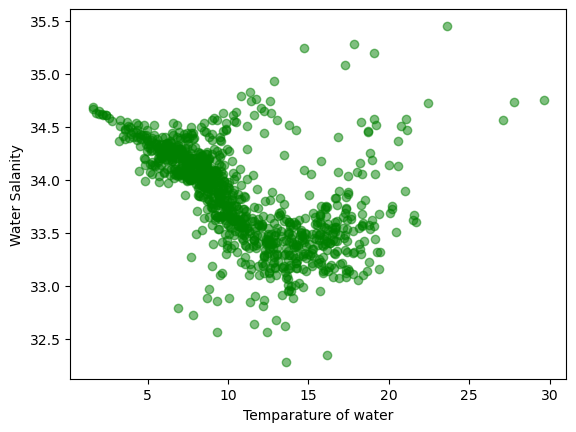

In [69]:
#plotting datapoints
plt.scatter(x = df['T_degC'], y = df['Salnty'], alpha = 0.5, c='g')
plt.xlabel("Temparature of water")
plt.ylabel("Water Salanity")
plt.show()

In [22]:
X = df['T_degC']
y = df['Salnty']

In [23]:
#splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 10)

In [25]:
print(X_train.shape)
print(y_train.shape)

(700,)
(700,)


In [28]:
#fitting data into LinearRegression()
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

LinearRegression()

In [29]:
m = lr.coef_
m

array([[-0.05297884]])

In [31]:
c = lr.intercept_
c

array([34.41731685])

In [35]:
y_pred = lr.predict(np.array(X_test).reshape(-1, 1))

In [37]:
#scaling of this model
r2_score(y_test, y_pred)

0.3201386653074929

In [44]:
x_input =  np.linspace(0, 30, 500)

#formula for straight line
y_input = m * x_input + c
y_input = y_input.reshape(-1, 1)

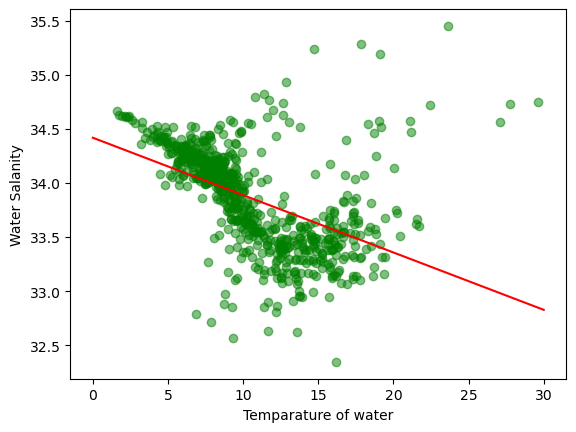

In [70]:
plt.scatter(x = X_train, y = y_train, alpha = 0.5, c='g')
plt.plot(x_input, y_input, c='r')
plt.xlabel("Temparature of water")
plt.ylabel("Water Salanity")
plt.show()

In [ ]:
#for inference Sklearn uses the exact Ordinary Least Squares (OLS) method which we implemented to perform linear regression.